# Binary AND-gate

Found folder: C:\repositories\ProbabilisticComputing\Circuit_Library
Processing case: Floating State (h_bipolar = [1.0, 1.0, -2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/AND_Floating_State.png


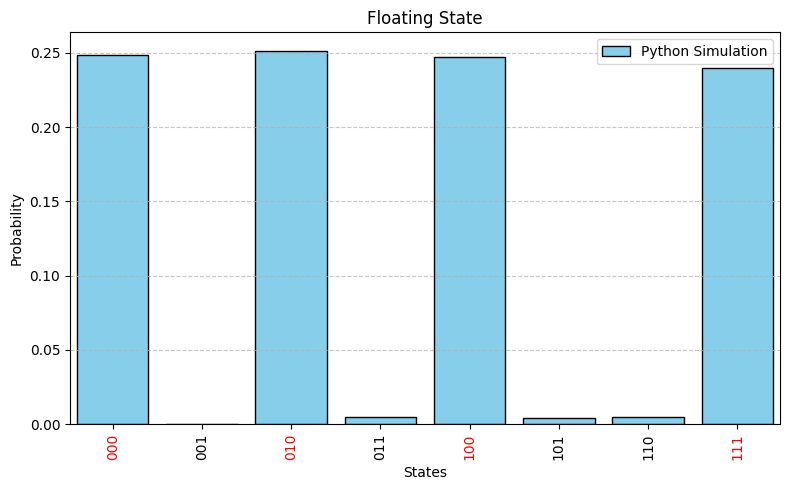

Processing case: A=0,B=0 (h_bipolar = [-16.0, -16.0, -2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/AND_A=0,B=0.png


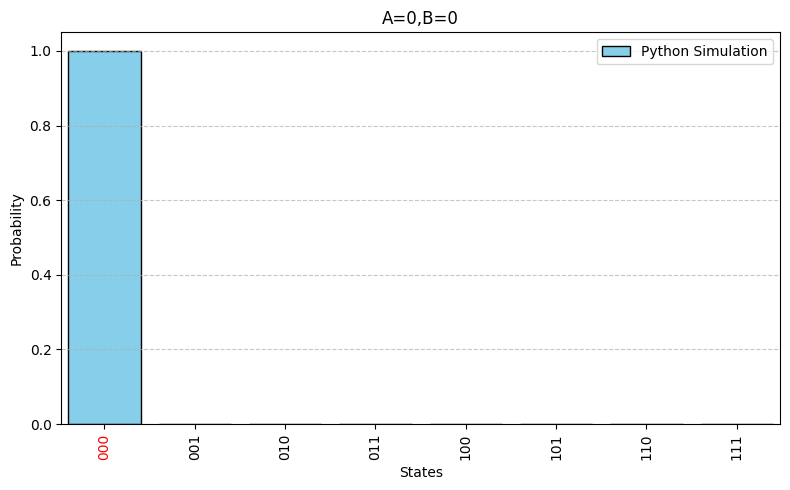

Processing case: A=1 (h_bipolar = [15.0, -16.0, -2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/AND_A=1.png


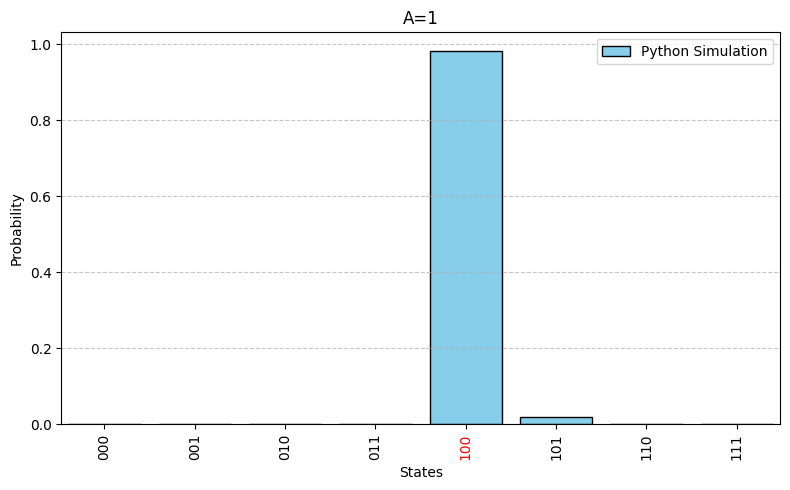

Processing case: B=1 (h_bipolar = [-16.0, 15.0, -2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/AND_B=1.png


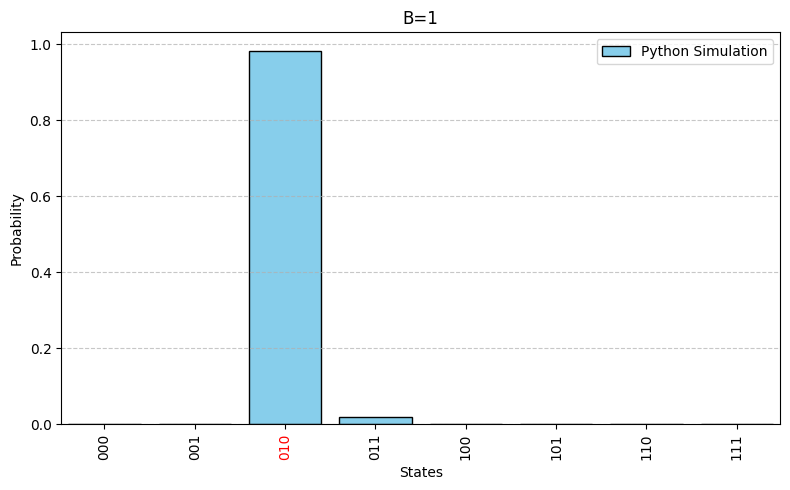

Processing case: A=1,B=1 (h_bipolar = [15.0, 15.0, -2.0]) with selected bits [0, 1, 2]
Saved plot: Plots/AND_A=1,B=1.png


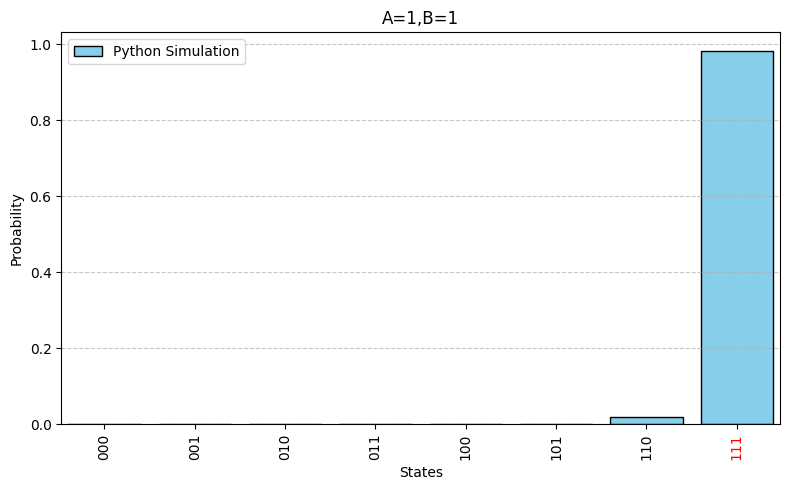

Processing case: C=0 (h_bipolar = [1.0, 1.0, -16.0]) with selected bits [0, 1, 2]
Saved plot: Plots/AND_C=0.png


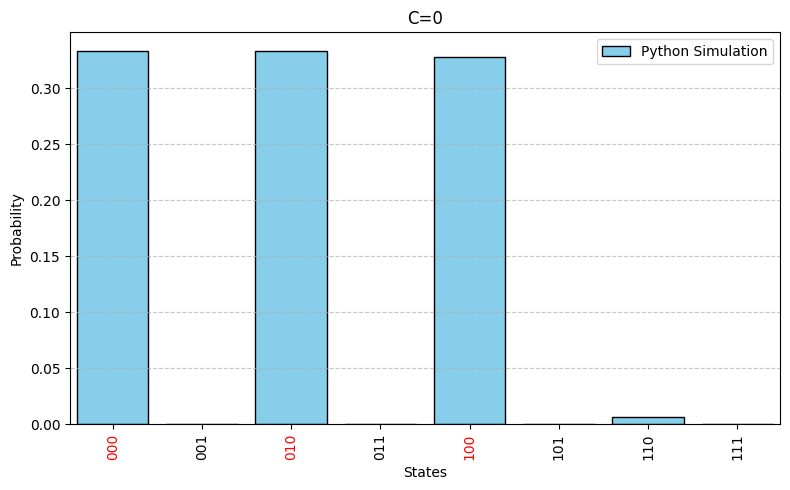

Processing case: C=1 (h_bipolar = [1.0, 1.0, 15.0]) with selected bits [0, 1, 2]
Saved plot: Plots/AND_C=1.png


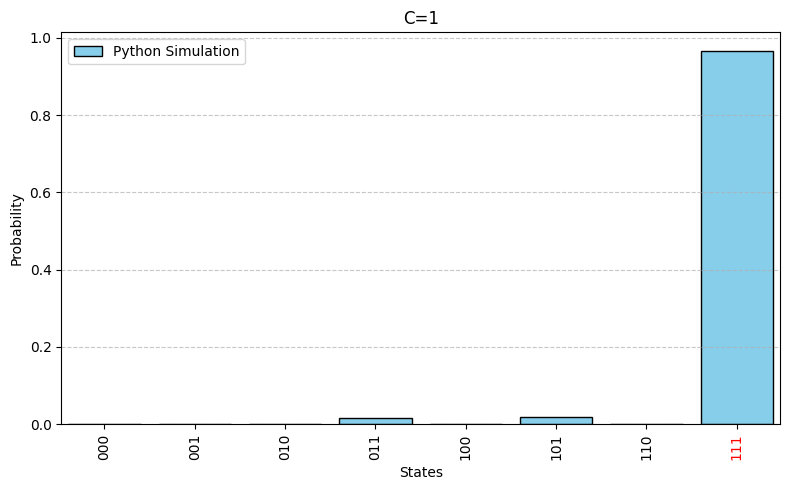

In [2]:
from Scripts import simulate_p_circuit as simulate_p_circuit
import Scripts.CustomScripts as CS

J, h, node_order = CS.load_npz_data("AND.npz", target_folder="Circuit_Library")

# Define your target_names dictionary
target_names = {
    "Floating State": {
    },
    "A=0,B=0": {
        "A":"push0",
        "B":"push0"
    },
    "A=1": {
        "A":"push1",
        "B":"push0",
    },
    "B=1": {
        "A":"push0",
        "B":"push1"
    },
    "A=1,B=1": {
        "A":"push1",
        "B":"push1"
    },
    "C=0": {
        "C":"push0"
    },
    "C=1": {
        "C":"push1"
    },
}

# Get the updated configurations:
configured_h = CS.update_all_configurations(target_names, h, node_order)

selected_bits = {
    "Floating State": ["A","B","C"], 
    "A=0,B=0": ["A","B","C"],  
    "A=1": ["A","B","C"],  
    "B=1": ["A","B","C"],
    "A=1,B=1": ["A","B","C"],    
    "C=0": ["A","B","C"],  
    "C=1": ["A","B","C"],  
}
simulate_p_circuit.plot_probabilities(num_steps=100000, savefig=True, save_csv=False,J_bipolar=J, node_order=node_order,
                                      h_bipolar_dict=configured_h, use_python=True, use_boltzmann=False, 
                                      filename="AND", figWidth=8, selected_bits=selected_bits)

# 3 P-bit AND-gate Python Simulation (Bipolar output mapped to binary)
This notebook simulates and plots the floating and clamping states of a 3 P-bit AND-gate. This is given by the following formulas: 
$$
m_i(t)=\textrm{sgn}\Big[\textrm{rand}(-1,1)+\tanh(I_i(t))\Big]
$$
$$
I_i(t)=I_0(h_i+\sum_j J_{ij}m_j(t))
$$
The output $m$ is converted to binary before plotting the bars. (The equations describe a bipolar system)

The weight matrix $\mathbf{J}$ and bias vector $\mathbf{h}$ is given by an Ising Hamiltonian formulation:
$$
H_{Ising}=\sum_i h_i\sigma_i+\sum_{\langle i,j \rangle} J_{ij}\sigma_i\sigma_j
$$
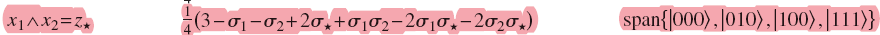

Meaning the matrix and vector is:
$$
\mathbf{J}=
\begin{pmatrix}
    0 & -1 & 2 \\
    -1 & 0 & 2 \\
    2 & 2 & 0
\end{pmatrix}, \quad\quad
\mathbf{h}=(1,1,-2)
$$

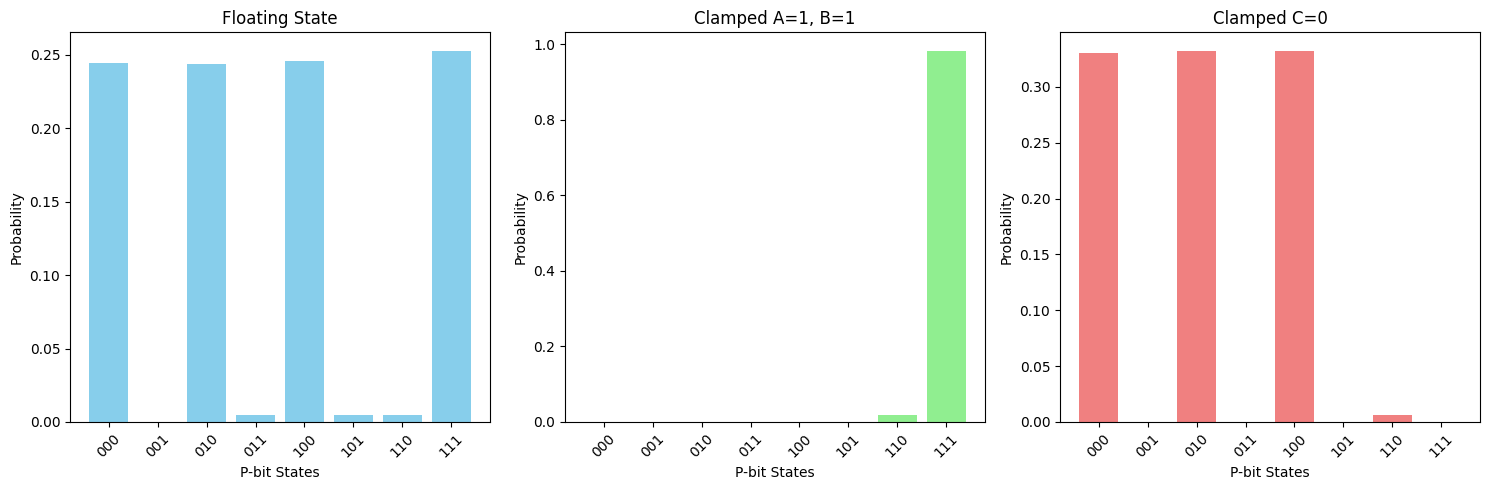

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import os

def sign(x):
    return 1 if x > 0 else -1

# Function to simulate P-bits for different states
def simulate_p_bits_clamped(num_steps=1000, I0=1.0, clamp_A=False, clamp_B=False, clamp_C=False):
    # AND gate parameters

    # Weight matrix
    J = np.array([
        [0, -1, 2],
        [-1, 0, 2],
        [2, 2, 0]
    ])
    
    # Bias 
    h = np.array([1, 1, -2])  

    # Modify h to clamp A, B, or C
    if clamp_A:
        h[0] = 10  # Clamp A to 1
    if clamp_B:
        h[1] = 10  # Clamp B to 1
    if clamp_C:
        h[2] = -10  # Clamp C to 0

    # Initialize P-bits (binary representation: 0 or 1)
    m = np.random.choice([0, 1], size=3)
    
    # To convert binary m to bipolar {-1, 1}
    def binary_to_bipolar(x):
        return 2 * x - 1
    
    # Convert bipolar {-1, 1} to binary {0, 1}
    def bipolar_to_binary(x):
        return (x + 1) // 2

    # Record outputs
    m_history = []
    for _ in range(num_steps):
        for i in range(3):  # Sequentially update all P-bits
            # bipolar_m = binary_to_bipolar(m)
            I_i = I0 * (h[i] + np.dot(J[i], m))
            # print(I_i)
            random_value = np.random.uniform(-1, 1)  # Random value between -1 and 1
            m[i] = sign(random_value + np.tanh(I_i))  # Update P-bit based on Equation (1)

        m_history.append(bipolar_to_binary(m.copy()))

    return np.array(m_history)

# Function to plot the probabilities for different conditions
def plot_probabilities(num_steps=10000,savefig=False):
    # Generate all possible states
    all_states = np.array(list(product([0, 1], repeat=3)))

    # Initialize subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Floating state simulation
    results_floating = simulate_p_bits_clamped(num_steps=num_steps)
    unique_states_floating, counts_floating = np.unique(results_floating, axis=0, return_counts=True)
    probabilities_floating = counts_floating / np.sum(counts_floating)

    # Map probabilities for floating state
    state_probabilities_floating = {tuple(state): 0 for state in all_states}
    for state, prob in zip(unique_states_floating, probabilities_floating):
        state_probabilities_floating[tuple(state)] = prob

    # Prepare data for floating state plot
    states_str = [''.join(map(str, state)) for state in all_states]
    prob_values_floating = [state_probabilities_floating[tuple(state)] for state in all_states]

    # Plot floating state
    axs[0].bar(states_str, prob_values_floating, color='skyblue')
    axs[0].set_title('Floating State')
    axs[0].set_xlabel('P-bit States')
    axs[0].set_ylabel('Probability')
    axs[0].tick_params(axis='x', rotation=45)

    # Clamp A=1, B=1 state simulation
    results_clamped_AB = simulate_p_bits_clamped(num_steps=num_steps, clamp_A=True, clamp_B=True)
    unique_states_AB, counts_AB = np.unique(results_clamped_AB, axis=0, return_counts=True)
    probabilities_AB = counts_AB / np.sum(counts_AB)

    # Map probabilities for A=1, B=1 clamped state
    state_probabilities_AB = {tuple(state): 0 for state in all_states}
    for state, prob in zip(unique_states_AB, probabilities_AB):
        state_probabilities_AB[tuple(state)] = prob

    # Prepare data for clamped A=1, B=1 state plot
    prob_values_AB = [state_probabilities_AB[tuple(state)] for state in all_states]

    # Plot clamped A=1, B=1 state
    axs[1].bar(states_str, prob_values_AB, color='lightgreen')
    axs[1].set_title('Clamped A=1, B=1')
    axs[1].set_xlabel('P-bit States')
    axs[1].set_ylabel('Probability')
    axs[1].tick_params(axis='x', rotation=45)

    # Clamp C=1 state simulation
    results_clamped_C = simulate_p_bits_clamped(num_steps=num_steps, clamp_C=True)
    unique_states_C, counts_C = np.unique(results_clamped_C, axis=0, return_counts=True)
    probabilities_C = counts_C / np.sum(counts_C)

    # Map probabilities for C=1 clamped state
    state_probabilities_C = {tuple(state): 0 for state in all_states}
    for state, prob in zip(unique_states_C, probabilities_C):
        state_probabilities_C[tuple(state)] = prob

    # Prepare data for clamped C=1 state plot
    prob_values_C = [state_probabilities_C[tuple(state)] for state in all_states]

    # Plot clamped C=1 state
    axs[2].bar(states_str, prob_values_C, color='lightcoral')
    axs[2].set_title('Clamped C=0')
    axs[2].set_xlabel('P-bit States')
    axs[2].set_ylabel('Probability')
    axs[2].tick_params(axis='x', rotation=45)

    # Layout adjustments and display
    plt.tight_layout()
    if (savefig == True):
        file_name = f"AND_gate_PythonSim.png"
        axs[0].set_title('')
        axs[1].set_title('')
        axs[2].set_title('')
        plt.savefig(os.path.join("Plots", file_name), dpi=300)
    plt.show()

# Run the plot
plot_probabilities(num_steps=100000, savefig=False)

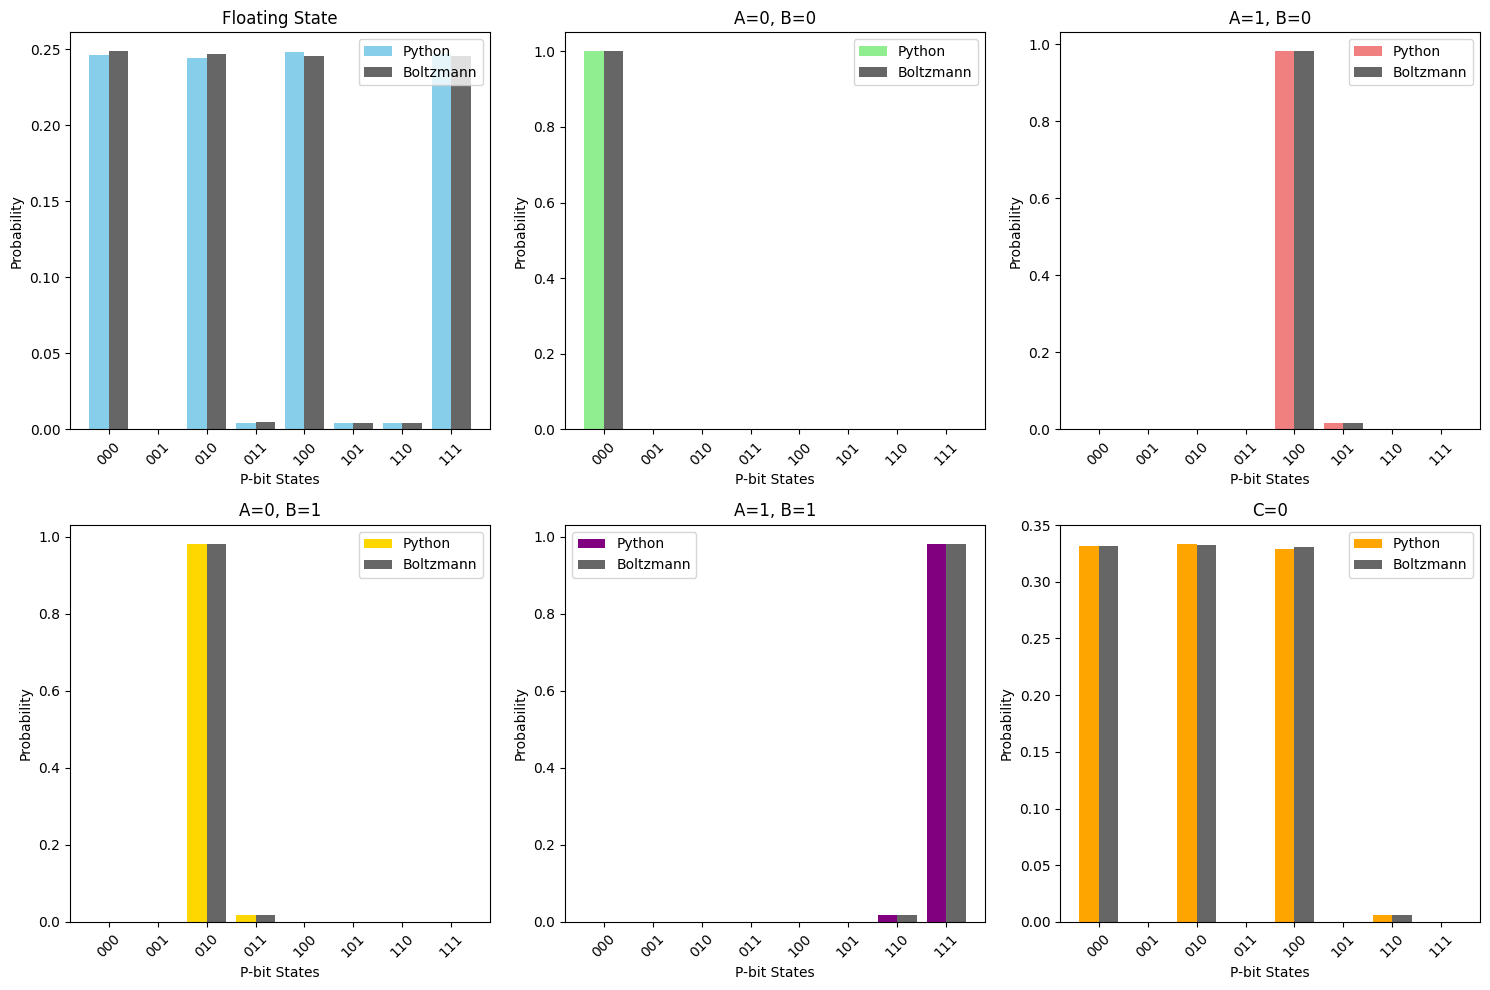

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import os

def sign(x):
    return 1 if x > 0 else -1

def compute_energy(m, J, h, I0):
    interaction_term = -0.5 * np.dot(m, J.dot(m))
    bias_term = -np.dot(h, m)
    return I0 * (interaction_term + bias_term)

def boltzmann_distribution(J, h, I0):
    all_states = np.array(list(product([-1, 1], repeat=len(h))))
    energies = np.array([compute_energy(state, J, h,I0) for state in all_states])
    boltzmann_probs = np.exp(-energies)
    return boltzmann_probs / np.sum(boltzmann_probs)

def binary_to_bipolar(x):
    return 2 * x - 1

def bipolar_to_binary(x):
    return (x + 1) // 2

# Function to simulate P-bits for different states
def simulate_p_bits_clamped(num_steps=1000, I0=1.0, clamp_A=None, clamp_B=None, clamp_C=None, use_boltzmann=False):

    # Weight matrix
    J = np.array([
        [0, -1, 2],
        [-1, 0, 2],
        [2, 2, 0]
    ])
    
    # Bias 
    h = np.array([1, 1, -2]) 

    # Modify h to clamp A, B, or C
    if clamp_A is not None:
        h[0] = 10 if clamp_A else -10
    if clamp_B is not None:
        h[1] = 10 if clamp_B else -10
    if clamp_C is not None:
        h[2] = 20 if clamp_C else -20
        
    # Initialize P-bits (binary representation: 0 or 1)
    m = np.random.choice([-1, 1], size=3)

    # Compute Boltzmann probabilities if needed
    if use_boltzmann:
        all_states = np.array(list(product([0, 1], repeat=3)))
        probabilities = boltzmann_distribution(J, h, I0)
        return all_states[np.random.choice(len(all_states), num_steps, p=probabilities)]

    # Record outputs
    m_history = []
    for _ in range(num_steps):
        for i in range(3):  # Sequentially update all P-bits
            I_i = I0 * (h[i] + np.dot(J[i], m))
            random_value = np.random.uniform(-1, 1)  # Random value between -1 and 1
            m[i] = sign(random_value + np.tanh(I_i))  # Update P-bit based on Equation (1)

        m_history.append(bipolar_to_binary(m.copy()))

    return np.array(m_history)

# Function to plot the probabilities for different conditions
def plot_probabilities(num_steps=10000, savefig=False,I0=1.0):
    # Generate all possible states
    all_states = np.array(list(product([0, 1], repeat=3)))

    # Define clamping conditions
    conditions = [
        (None, None, None, 'Floating State', 'skyblue'),
        (False, False, None, 'A=0, B=0', 'lightgreen'),
        (True, False, None, 'A=1, B=0', 'lightcoral'),
        (False, True, None, 'A=0, B=1', 'gold'),
        (True, True, None, 'A=1, B=1', 'purple'),
        (None, None, False, 'C=0', 'orange')
    ]

    # Initialize subplots
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.flatten()
    
    bar_width = 0.4
    
    for i, (clamp_A, clamp_B, clamp_C, title, color) in enumerate(conditions):
        results = simulate_p_bits_clamped(num_steps=num_steps, I0=I0,clamp_A=clamp_A, clamp_B=clamp_B, clamp_C=clamp_C)
        results_boltzmann = simulate_p_bits_clamped(num_steps=num_steps, I0=I0, clamp_A=clamp_A, clamp_B=clamp_B, clamp_C=clamp_C, use_boltzmann=True)
        
        unique_states, counts = np.unique(results, axis=0, return_counts=True)
        probabilities = counts / np.sum(counts)
        
        unique_states_b, counts_b = np.unique(results_boltzmann, axis=0, return_counts=True)
        probabilities_b = counts_b / np.sum(counts_b)

        # Map probabilities
        state_probabilities = {tuple(state): 0 for state in all_states}
        state_probabilities_b = {tuple(state): 0 for state in all_states}
        
        for state, prob in zip(unique_states, probabilities):
            state_probabilities[tuple(state)] = prob
        
        for state, prob in zip(unique_states_b, probabilities_b):
            state_probabilities_b[tuple(state)] = prob

        # Prepare data for plot
        states_str = [''.join(map(str, state)) for state in all_states]
        prob_values = [state_probabilities[tuple(state)] for state in all_states]
        prob_values_b = [state_probabilities_b[tuple(state)] for state in all_states]

        # Plot
        x = np.arange(len(states_str))
        axs[i].bar(x - bar_width/2, prob_values, bar_width, color=color, label='Python')
        axs[i].bar(x + bar_width/2, prob_values_b, bar_width, color='black', alpha=0.6, label='Boltzmann')
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(states_str)
        if (savefig == False):
            axs[i].set_title(title)
        axs[i].set_xlabel('P-bit States')
        axs[i].set_ylabel('Probability')
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].legend()
    
    # Hide any unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
    
    # Layout adjustments and display
    plt.tight_layout()
    if savefig:
        file_name = "AND_gate_PythonSim_Boltzmann.png"
        plt.savefig(os.path.join("Plots", file_name), dpi=300)
    plt.show()

# Run the plot
plot_probabilities(num_steps=100000,I0 =1.0, savefig=False)
